# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Load Dataset & Explore

In [2]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/queens.csv')

df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,10234,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Queens
1,10524,1950,1.0,1,950,1,3.0,83,0,0,0,0,0,0,0,0,Forest Hills,Queens
2,5465,3500,1.0,1,996,9,7.0,3,1,0,0,0,0,0,0,0,Astoria,Queens
3,5259,1725,1.0,1,800,1,2.0,89,0,0,0,0,0,0,0,0,Astoria,Queens
4,9736,1700,1.0,1,730,10,3.0,7,0,0,0,0,0,0,0,0,Briarwood,Queens


In [3]:
# hilangin kolom/atribut rental_id, neighborhood, dan borough
df = df.iloc[:, 1:-2]

df.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0
1,1950,1.0,1,950,1,3.0,83,0,0,0,0,0,0,0,0
2,3500,1.0,1,996,9,7.0,3,1,0,0,0,0,0,0,0
3,1725,1.0,1,800,1,2.0,89,0,0,0,0,0,0,0,0
4,1700,1.0,1,730,10,3.0,7,0,0,0,0,0,0,0,0


In [4]:
# liat ukuran data
df.shape

(448, 15)

In [5]:
# liat informasi data baik tipe data dan nilai null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rent              448 non-null    int64  
 1   bedrooms          448 non-null    float64
 2   bathrooms         448 non-null    int64  
 3   size_sqft         448 non-null    int64  
 4   min_to_subway     448 non-null    int64  
 5   floor             448 non-null    float64
 6   building_age_yrs  448 non-null    int64  
 7   no_fee            448 non-null    int64  
 8   has_roofdeck      448 non-null    int64  
 9   has_washer_dryer  448 non-null    int64  
 10  has_doorman       448 non-null    int64  
 11  has_elevator      448 non-null    int64  
 12  has_dishwasher    448 non-null    int64  
 13  has_patio         448 non-null    int64  
 14  has_gym           448 non-null    int64  
dtypes: float64(2), int64(13)
memory usage: 52.6 KB


In [6]:
# cek data kembar
df.duplicated().value_counts()

False    436
True      12
dtype: int64

In [7]:
# hapus data kembar
df = df.drop_duplicates()

df.duplicated().value_counts()

False    436
dtype: int64

<AxesSubplot:ylabel='rent'>

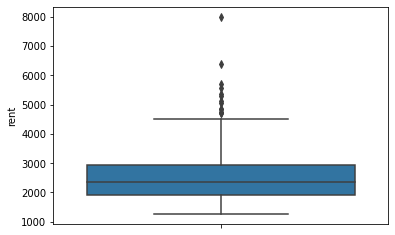

In [8]:
# cek outlier pada variabel dependen
sns.boxplot(data=df, y='rent')

In [9]:
# coba hapus outlier
q1, q3 = df.rent.quantile(0.25), df.rent.quantile(0.75)
iqr = q3-q1

df = df[df.rent < (q3 + (1.5*iqr))]

<AxesSubplot:ylabel='rent'>

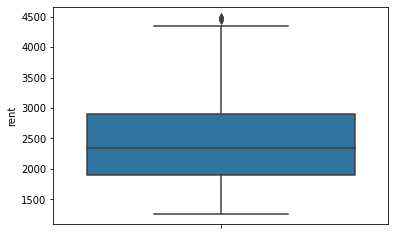

In [10]:
# liat masih ga ada outlier dikit, tapi ga jauh jadi biarin aja lanjutt
sns.boxplot(data=df, y='rent')

In [11]:
# liat ukuran data sesudah hilangin outlier
df.shape

(423, 15)

In [12]:
# cek korelasi pake tabel
df.corr()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
rent,1.000000,0.460087,0.443499,0.484346,-0.048316,0.341166,-0.412962,0.283589,0.073822,0.007668,0.092964,0.173555,0.079000,0.048606,0.120734
bedrooms,0.460087,1.000000,0.486019,0.750255,0.039290,-0.139543,0.183758,-0.132536,-0.104750,-0.086808,-0.055065,-0.040254,-0.063695,-0.018053,-0.042581
bathrooms,0.443499,0.486019,1.000000,0.506347,-0.058442,0.043434,-0.015523,-0.034400,0.043101,-0.056118,0.042626,0.064577,0.056396,0.029444,0.066793
size_sqft,0.484346,0.750255,0.506347,1.000000,-0.036280,-0.119203,0.086787,-0.131475,-0.023812,-0.012224,0.032019,0.105874,0.033289,0.041207,0.059914
min_to_subway,-0.048316,0.039290,-0.058442,-0.036280,1.000000,-0.016475,-0.098605,0.064130,-0.003401,-0.021947,0.170733,-0.028201,-0.050928,-0.019397,-0.013563
floor,0.341166,-0.139543,0.043434,-0.119203,-0.016475,1.000000,-0.370050,0.288898,0.057955,-0.016508,-0.035711,-0.003518,0.023369,-0.063163,-0.015734
building_age_yrs,-0.412962,0.183758,-0.015523,0.086787,-0.098605,-0.370050,1.000000,-0.353396,-0.077583,0.002972,-0.049130,-0.053276,-0.058228,-0.017671,-0.046305
no_fee,0.283589,-0.132536,-0.034400,-0.131475,0.064130,0.288898,-0.353396,1.000000,0.095687,0.002190,-0.012876,0.032072,-0.009023,-0.009510,0.043185
has_roofdeck,0.073822,-0.104750,0.043101,-0.023812,-0.003401,0.057955,-0.077583,0.095687,1.000000,0.329302,0.462796,0.622863,0.592727,0.284110,0.621224
has_washer_dryer,0.007668,-0.086808,-0.056118,-0.012224,-0.021947,-0.016508,0.002972,0.002190,0.329302,1.000000,0.392062,0.474481,0.512545,0.099934,0.425174


<AxesSubplot:>

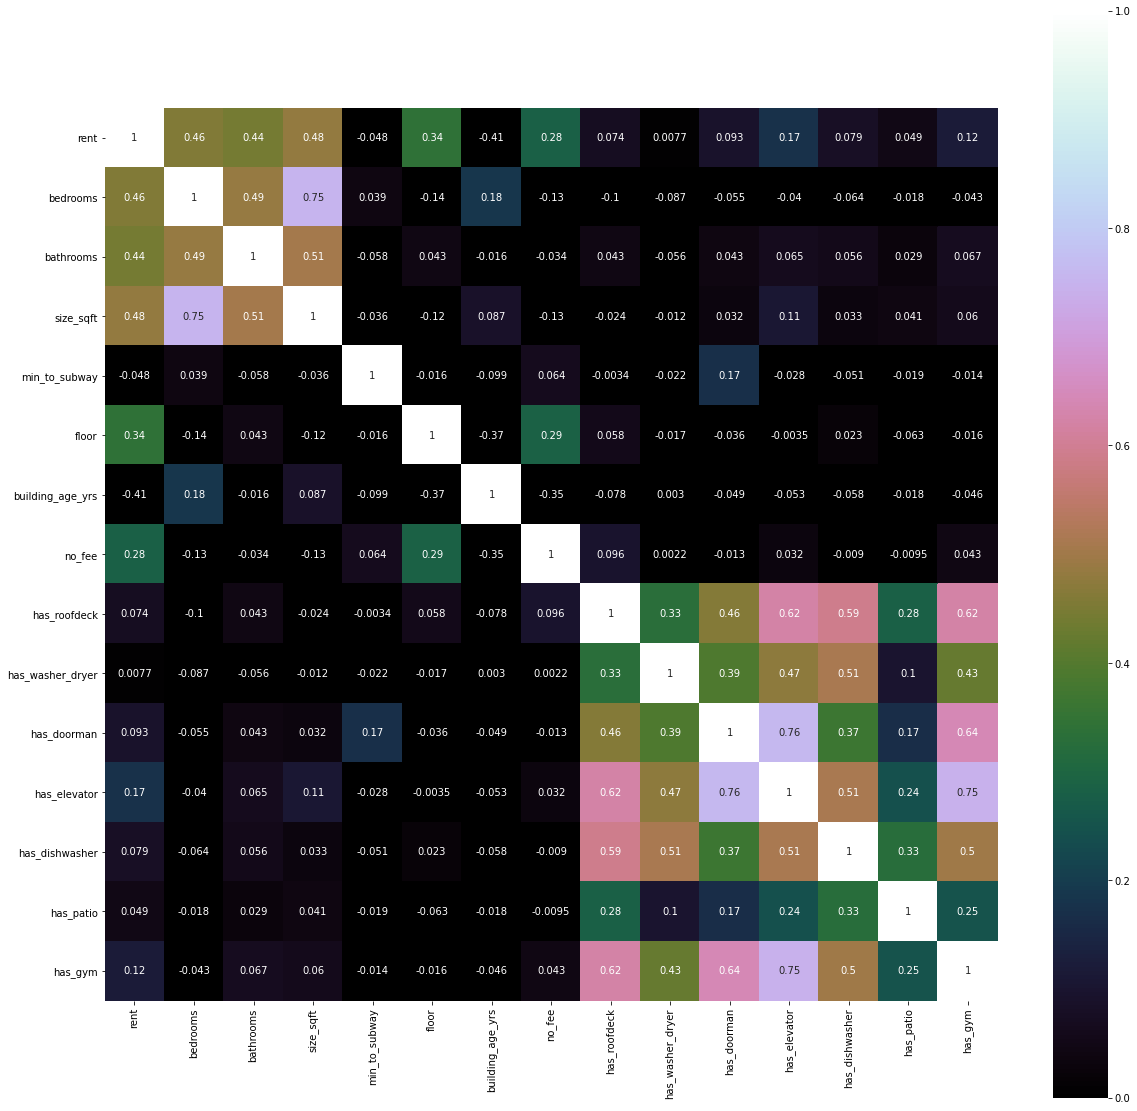

In [13]:
# cek korelasi pake visualisasi
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix', square=True, vmin=0, vmax=1)

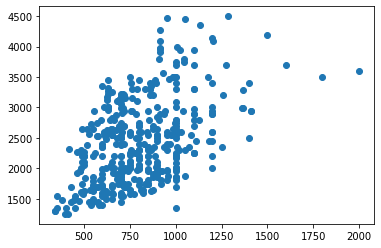

In [14]:
# plotting koerlasi size_sqft sm rent
plt.plot(df.size_sqft, df.rent, 'o')

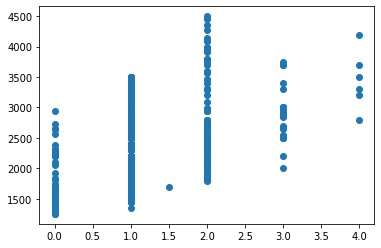

In [15]:
# plot korelasi bedrooms sm rent
plt.plot(df.bedrooms, df.rent, 'o')

# Linear Regression

In [16]:
# pilih fitur sm label
x = df.size_sqft.values.reshape(-1, 1)
y = df.rent

In [17]:
# buat model dan latih
regr = LinearRegression()
regr.fit(x, y)

LinearRegression()

In [18]:
# liat nilai slope sm intercept model
regr.coef_, regr.intercept_

(array([1.43538329]), 1278.2385058962311)

In [19]:
# prediksi
y_pred = regr.predict(x)

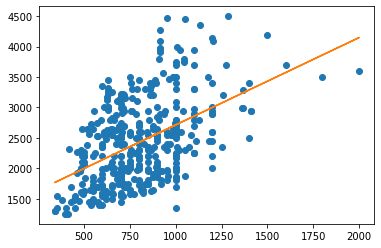

In [20]:
# plot hasil sebenarnya dan prediksi
plt.plot(x, y, 'o')
plt.plot(x, y_pred)
plt.show()

## Evaluation

### MSE

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

357922.8369077334

### MAE

In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, y_pred)

502.2167002226193

### R² Score

In [23]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.23459147456741292

In [24]:
# bandingin nilai sebenarnya dan prediksi
comp = pd.DataFrame({'actual':y,'predict':y_pred})
comp.predict = round(comp.predict)
comp.head(10)

,actual,predict
0,3000,2714.0
1,1950,2642.0
2,3500,2708.0
3,1725,2427.0
4,1700,2326.0
5,2550,2714.0
6,2550,2830.0
7,3100,2408.0
8,1399,2111.0
9,2275,1969.0


# Multiple Linear Regression

In [25]:
# pilih fitur (lebih dari 1) dan labelnya
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [26]:
# bagi data training dan testing (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [27]:
# buat model dan latih
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [28]:
#prediksi
y_pred = mlr.predict(x_test)

## Evaluation

### MSE

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

184038.58442832637

### MAE

In [30]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

346.19761045755934

### R² Score

In [31]:
print(f"Train score: {mlr.score(x_train, y_train)}")
print(f"Test score: {mlr.score(x_test, y_test)}")

Train score: 0.6352135667563967
Test score: 0.5541425632888715


In [32]:
# bandingin nilai sebenarnya dan prediksi
comp = pd.DataFrame({'actual':y_test,'predict':y_pred})
comp.predict = round(comp.predict)
comp.head(10)

,actual,predict
141,2650,2877.0
399,3500,4191.0
252,2250,2731.0
157,2600,3131.0
23,2350,2238.0
56,2550,2536.0
426,1800,2070.0
130,2400,2635.0
206,2100,2487.0
43,3450,3249.0


# Logistic Regression

In [33]:
df.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0
1,1950,1.0,1,950,1,3.0,83,0,0,0,0,0,0,0,0
2,3500,1.0,1,996,9,7.0,3,1,0,0,0,0,0,0,0
3,1725,1.0,1,800,1,2.0,89,0,0,0,0,0,0,0,0
4,1700,1.0,1,730,10,3.0,7,0,0,0,0,0,0,0,0


In [34]:
# ubah nilai kontinyu ke diskrit
group_names = ['Cheap', 'Normal', 'Expensive']
bins = np.linspace(min(df.rent), max(df.rent), 4)
bins

array([1250.        , 2333.33333333, 3416.66666667, 4500.        ])

In [35]:
# buat variabel versi diskritnya
df['rent_category'] = pd.cut(df.rent, bins, labels=group_names, include_lowest=True)

df.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,rent_category
0,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Normal
1,1950,1.0,1,950,1,3.0,83,0,0,0,0,0,0,0,0,Cheap
2,3500,1.0,1,996,9,7.0,3,1,0,0,0,0,0,0,0,Expensive
3,1725,1.0,1,800,1,2.0,89,0,0,0,0,0,0,0,0,Cheap
4,1700,1.0,1,730,10,3.0,7,0,0,0,0,0,0,0,0,Cheap


In [36]:
# cek jumlah nilainya
df.rent_category.value_counts()

Cheap        210
Normal       177
Expensive     36
Name: rent_category, dtype: int64

In [37]:
# pilih fitur sm labelnya
x = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [38]:
# bagi data training sm testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [39]:
# normalisasi nilai fiturnya (wajib kalo ga error)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [40]:
# buat model dan latih
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [41]:
# prediksi
y_pred = clf.predict(x_test)

<AxesSubplot:>

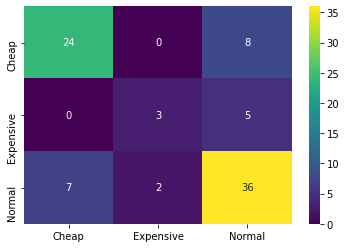

In [42]:
# visualisasiin nilai sebenarnya dan prediksi
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot = True,
    xticklabels=sorted(group_names),
    yticklabels=sorted(group_names),
    cmap='viridis'
)

## Evaluation

In [43]:
print(f"Train score: {clf.score(x_train, y_train)}")
print(f"Test score: {clf.score(x_test, y_test)}")

Train score: 0.7781065088757396
Test score: 0.7411764705882353


In [44]:
print(f"(Precision, Recall, F1 Score): {precision_recall_fscore_support(y_test, y_pred, average='macro')[:-1]}")

(Precision, Recall, F1 Score): (0.7029624753127056, 0.6416666666666667, 0.663133556750578)
